In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [27]:
df = pd.read_csv('heights.csv')
df.shape

(10000, 2)

In [28]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


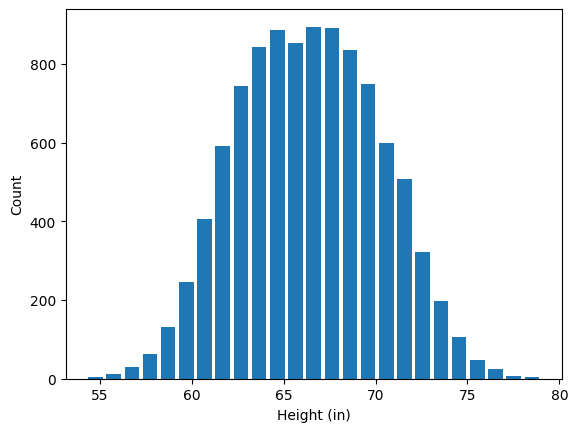

In [29]:
plt.hist(df['height'], bins=25, rwidth=0.8)
plt.xlabel('Height (in)')
plt.ylabel('Count')
plt.show()

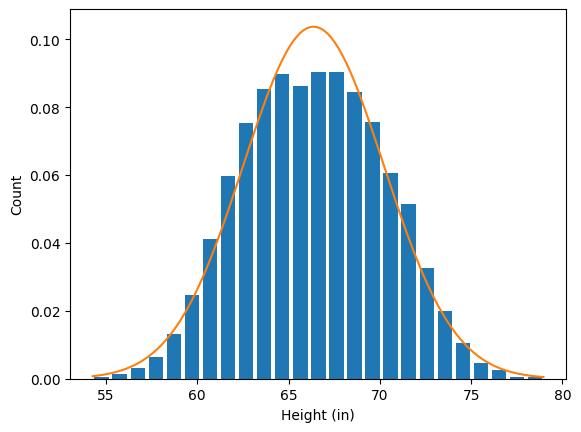

In [30]:
plt.hist(df['height'], bins=25, rwidth=0.8, density=True)
plt.xlabel('Height (in)')
plt.ylabel('Count')

rng = np.arange(df['height'].min(), df['height'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['height'].mean(), df['height'].std()))

plt.show()

In [31]:
upper_limit = df['height'].mean() + 3 * df['height'].std()
lower_limit = df['height'].mean() - 3 * df['height'].std()
upper_limit, lower_limit

(77.91014411725271, 54.824975392479274)

In [32]:
df[(df['height'] > upper_limit) | (df['height'] < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [33]:
df_no_outliers = df[(df['height'] < upper_limit) & (df['height'] > lower_limit)]
df_no_outliers.shape

(9993, 2)

In [34]:
df['zscore'] = (df['height'] - df['height'].mean()) / df['height'].std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [35]:
df[(df['zscore'] > 3) | (df['zscore'] < -3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027
